In [1]:
#Implement two layer feed forward neural network for XOR logic gate with 2-bit binary input using sigmoid activation. Verify the number of learnable parameters in the model. 

import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader


In [2]:
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([0, 1, 0, 1], dtype=torch.float32)
losses =[]

class XORmodel(nn.Module): 
    def __init__(self):
        super(XORmodel, self).__init__()
        self.w = torch.nn.Parameter(torch.rand([6]))
        self.b = torch.nn.Parameter(torch.rand([3]))
        self.model = nn.Sequential(nn.Linear(2, 2, bias = True),
                             nn.Sigmoid(),
                             nn.Linear(2, 1, bias = True),
                             nn.Sigmoid())

    def forward(self, x): 
        y_out = self.model(x)
        return y_out

class customdataset(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x)
    self.y = torch.tensor(y)

  def size(self):
    return len(self.x)

  def get_item(self, index):
    return [self.x[index], self.y[index]]


data = customdataset(x, y)
batch_size = 1
train_data_loader = DataLoader(list(zip(data.x, data.y)), batch_size, shuffle = True)
m1 = XORmodel()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(m1.parameters(), lr = 0.03)

for epoch in range(2000):
    m1.train(True)
    loss_t = 0
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = m1.forward(inputs)
        loss = loss_fn(outputs.flatten(), labels)
        loss.backward()
        optimizer.step()
        loss_t += loss.item()
    loss_t = loss_t/(len(train_data_loader)*batch_size)
    losses.append(loss_t)
    if epoch%10 == 0:
        print("Epoch number " + str(epoch) + " Loss is " + str(loss_t))

    

/tmp/ipykernel_592973/3364739189.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x = torch.tensor(x)
/tmp/ipykernel_592973/3364739189.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y)


Epoch number 0 Loss is 0.30473580956459045
Epoch number 10 Loss is 0.2867864463478327
Epoch number 20 Loss is 0.2729014977812767
Epoch number 30 Loss is 0.26306381076574326
Epoch number 40 Loss is 0.2565278112888336
Epoch number 50 Loss is 0.25237642601132393
Epoch number 60 Loss is 0.24974996969103813
Epoch number 70 Loss is 0.24800840020179749
Epoch number 80 Loss is 0.24680205434560776
Epoch number 90 Loss is 0.2458968088030815
Epoch number 100 Loss is 0.24514733254909515
Epoch number 110 Loss is 0.24448369443416595
Epoch number 120 Loss is 0.24386466294527054
Epoch number 130 Loss is 0.2432318516075611
Epoch number 140 Loss is 0.2425815798342228
Epoch number 150 Loss is 0.24188543111085892
Epoch number 160 Loss is 0.2411641925573349
Epoch number 170 Loss is 0.2404078096151352
Epoch number 180 Loss is 0.23958124965429306
Epoch number 190 Loss is 0.23871200159192085
Epoch number 200 Loss is 0.23779665306210518
Epoch number 210 Loss is 0.23680994659662247
Epoch number 220 Loss is 0.23

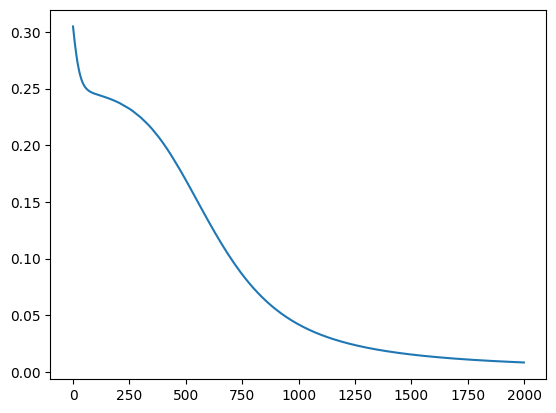

Parameter containing:
tensor([0.2885, 0.2452, 0.7757, 0.7667, 0.9504, 0.2625], requires_grad=True)
Parameter containing:
tensor([0.5189, 0.4779, 0.6637], requires_grad=True)


In [3]:
plt.plot([i for i in range(0, 2000)], losses)
plt.show()

print(list(m1.parameters())[0])
print(list(m1.parameters())[1])

In [4]:
#Repeat Q1 with RELU activation
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([0, 1, 0, 1], dtype=torch.float32)
losses =[]

class XORmodel(nn.Module): 
    def __init__(self):
        super(XORmodel, self).__init__()
        self.w = torch.nn.Parameter(torch.rand([6]))
        self.b = torch.nn.Parameter(torch.rand([]))
        self.model = nn.Sequential(nn.Linear(2, 2, bias = True),
                             nn.ReLU(),
                             nn.Linear(2, 1, bias = True),
                             nn.ReLU())

    def forward(self, x): 
        y_out = self.model(x)
        return y_out

class customdataset(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x)
    self.y = torch.tensor(y)

  def size(self):
    return len(self.x)

  def get_item(self, index):
    return [self.x[index], self.y[index]]


data = customdataset(x, y)
batch_size = 1
train_data_loader = DataLoader(list(zip(data.x, data.y)), batch_size, shuffle = True)
m1 = XORmodel()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(m1.parameters(), lr = 0.03)

for epoch in range(400):
    m1.train(True)
    loss_t = 0
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = m1.forward(inputs)
        loss = loss_fn(outputs.flatten(), labels)
        loss.backward()
        optimizer.step()
        loss_t += loss.item()
    loss_t = loss_t/(len(train_data_loader)*batch_size)
    losses.append(loss_t)
    if epoch%10 == 0:
        print("Epoch number " + str(epoch) + " Loss is " + str(loss_t))

    

Epoch number 0 Loss is 0.28562043979763985
Epoch number 10 Loss is 0.2701048478484154
Epoch number 20 Loss is 0.2630687654018402
Epoch number 30 Loss is 0.2554883286356926
Epoch number 40 Loss is 0.24573638290166855
Epoch number 50 Loss is 0.23066799342632294
Epoch number 60 Loss is 0.21452736854553223
Epoch number 70 Loss is 0.20252774469554424


/tmp/ipykernel_592973/1713976803.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x = torch.tensor(x)
/tmp/ipykernel_592973/1713976803.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y)


Epoch number 80 Loss is 0.19301252346485853
Epoch number 90 Loss is 0.12360277096740901
Epoch number 100 Loss is 0.0545669231651118
Epoch number 110 Loss is 0.01793874241411686
Epoch number 120 Loss is 0.004728253581561148
Epoch number 130 Loss is 0.0012141830811742693
Epoch number 140 Loss is 0.0002881046493712347
Epoch number 150 Loss is 6.312152618193068e-05
Epoch number 160 Loss is 1.4432525404117769e-05
Epoch number 170 Loss is 3.435979920141108e-06
Epoch number 180 Loss is 7.336936960200546e-07
Epoch number 190 Loss is 1.679194596704292e-07
Epoch number 200 Loss is 3.836356388120521e-08
Epoch number 210 Loss is 8.572645704418846e-09
Epoch number 220 Loss is 1.961010021034326e-09
Epoch number 230 Loss is 4.2856562743054383e-10
Epoch number 240 Loss is 1.0227285685004972e-10
Epoch number 250 Loss is 2.298428114499984e-11
Epoch number 260 Loss is 5.572431405198586e-12
Epoch number 270 Loss is 1.078248601515952e-12
Epoch number 280 Loss is 3.9968028886505635e-13
Epoch number 290 Loss

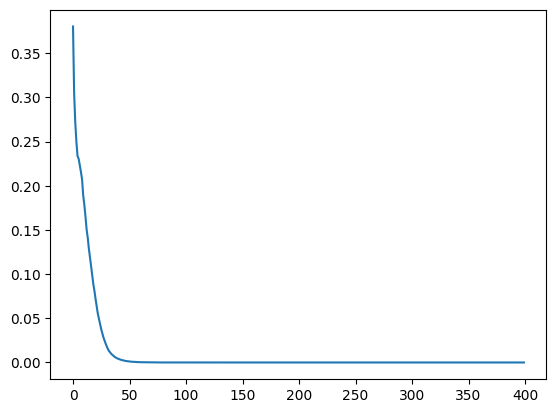

In [81]:
plt.plot([i for i in range(0, 400)], losses)
plt.show()

In [82]:
print(m1.w)
print(m1.b)

Parameter containing:
tensor([0.1650, 0.9525, 0.8272, 0.8201, 0.6134, 0.9035], requires_grad=True)
Parameter containing:
tensor([0.5896, 0.7304, 0.4969], requires_grad=True)


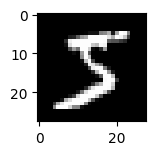

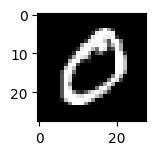

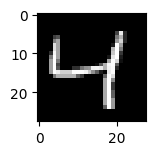

In [53]:
#3 manually verify the system outputs (done in notebook)
#Implement FF NN with two hidden layers for classifying ther handwritten digits using thr MNIST dataset. DIsplay classification accuracy in the form of a confusion matrix 

from keras.datasets import mnist
from torch import optim

(train_x, train_y), (test_x, test_y) = mnist.load_data()
for i in range(3):	
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [75]:
"""train_x = train_x.reshape(60000, 784)
train_x = torch.tensor(train_x, dtype = torch.float32)
train_y = torch.tensor(train_y, dtype = torch.float)

class mnistnn(nn.Module): 
    def __init__(self):
        super(mnistnn, self).__init__()
        self.w = torch.nn.Parameter(torch.rand([1]))
        self.b = torch.nn.Parameter(torch.rand([1]))
        self.model = nn.Sequential(nn.Linear(784, 784, bias = True),
                             nn.ReLU(),
                             nn.Linear(784, 784, bias = True),
                             nn.LogSoftmax(dim=1))

    def forward(self, x): 
        y_out = self.model(x)
        return y_out

class customdataset(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x)
    self.y = torch.tensor(y)

  def size(self):
    return len(self.x)

  def get_item(self, index):
    return [self.x[index], self.y[index]]

data = customdataset(train_x, train_y)
batch_size = 32
train_data_loader = DataLoader(list(zip(data.x, data.y)), batch_size, shuffle = True)
m1 = mnistnn()
loss_fn = nn.NLLLoss()
optimizer = optim.SGD(m1.parameters(), lr=0.003, momentum=0.9)

for epoch in range(400):
    m1.train(True)
    loss_t = 0
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = m1.forward(inputs)
        loss = loss_fn(outputs.flatten(), labels)
        loss.backward()
        optimizer.step()
        loss_t += loss.item()
    loss_t = loss_t/(len(train_data_loader)*batch_size)
    losses.append(loss_t)
    if epoch%10 == 0:
        print("Epoch number " + str(epoch) + " Loss is " + str(loss_t))

""""

/tmp/ipykernel_30477/762602553.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_x = torch.tensor(train_x, dtype = torch.float32)
/tmp/ipykernel_30477/762602553.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_y = torch.tensor(train_y, dtype = torch.float)
/tmp/ipykernel_30477/762602553.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x = torch.tensor(x)
/tmp/ipykernel_30477/762602553.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone(

tensor([-5.8307e+01, -1.9959e+01, -6.5089e+01, -7.7761e+01, -6.6668e+01,
        -3.9737e+01, -8.7139e+01, -7.4086e+01, -6.7829e+01, -7.5455e+01,
        -6.8237e+01, -8.4637e+01, -4.3863e+01, -8.0019e+01, -5.7700e+01,
        -4.9687e+01, -6.1291e+01, -2.0039e+01, -6.9785e+01, -3.7553e+01,
        -5.4050e+01, -4.5555e+01, -4.2785e+01, -5.4789e+01, -3.7998e+01,
        -9.4399e+01, -8.2344e+01, -9.5654e+01, -4.0923e+01, -7.2892e+01,
        -1.0820e+02, -6.9580e+01, -6.2958e+01, -5.5273e+01, -6.0079e+01,
        -5.7913e+01, -4.8869e+01, -5.6175e+01, -3.1639e+01, -1.0430e+02,
        -8.7374e+01, -7.0369e+01, -5.9036e+01, -6.3529e+01, -7.2439e+01,
        -7.7628e+01, -6.6684e+01, -6.1123e+01, -9.6788e+01, -8.0381e+01,
        -6.4315e+01, -8.9944e+01, -8.1249e+01, -9.7477e+01, -7.2344e+01,
        -2.3499e+01, -7.2153e+01, -7.9571e+01, -7.2671e+01, -4.8187e+01,
        -7.2983e+01, -5.5020e+01, -6.0522e+01, -5.1520e+01, -7.9182e+01,
        -9.8973e+01, -6.5785e+01, -5.8853e+01, -9.4

RuntimeError: size mismatch (got input: [25088], target: [32])

In [5]:
# q4
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transform
from torchvision.transforms import ToTensor
import torchvision.datasets as datasets
from torch.utils.data import Dataset,DataLoader

class DeepFFClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Linear(784,100,bias=True),
                                 nn.ReLU(),
                                 nn.Linear(100,100,bias=True),
                                 nn.ReLU(),
                                 nn.Linear(100,10,bias=True),
                                )
    def forward(self,x):
        x = x.view(-1, 784)
        return self.net(x)

mnist_trainset = datasets.MNIST(root="./data",download = True,train=True,transform=ToTensor())
train_loader = DataLoader(mnist_trainset,batch_size=50,shuffle=True)
mnist_testset = datasets.MNIST(root="./data",download = True,train=False,transform=ToTensor())
test_loader = DataLoader(mnist_testset,batch_size=50,shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepFFClassifier().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

total_params = 0
for name,param in model.named_parameters():
    params = param.numel()
    total_params += params

for epoch in range(6):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print(f"Finished Training. Final loss = {loss.item()}, Total params = {total_params}")

mat = [[0 for _ in range(10)] for _ in range(10)]

correct,total = 0,0
for i,vdata in enumerate(test_loader):
    tinputs,tlabels = vdata[0].to(device), vdata[1].to(device)
    toutputs = model(tinputs)

    _,predicted = torch.max(toutputs,1)
    total += tlabels.size(0)
    correct += (predicted==tlabels).sum()

    for i in range(len(predicted)):
        mat[predicted[i].item()][tlabels[i].item()] += 1
        
print(f"Correct = {correct}, Total = {total}")
for i in range(10):
    print(mat[i])  

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████| 9912422/9912422 [00:02<00:00, 4199165.11it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████| 28881/28881 [00:00<00:00, 128123.82it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████| 1648877/1648877 [00:03<00:00, 469962.36it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 3150409.92it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

[1,   100] loss: 2.288
[1,   200] loss: 2.249
[1,   300] loss: 2.190
[1,   400] loss: 2.092
[1,   500] loss: 1.921
[1,   600] loss: 1.683
[1,   700] loss: 1.398
[1,   800] loss: 1.144
[1,   900] loss: 0.934
[1,  1000] loss: 0.831
[1,  1100] loss: 0.713
[1,  1200] loss: 0.673
[2,   100] loss: 0.602
[2,   200] loss: 0.562
[2,   300] loss: 0.531
[2,   400] loss: 0.495
[2,   500] loss: 0.467
[2,   600] loss: 0.466
[2,   700] loss: 0.454
[2,   800] loss: 0.422
[2,   900] loss: 0.421
[2,  1000] loss: 0.410
[2,  1100] loss: 0.410
[2,  1200] loss: 0.401
[3,   100] loss: 0.390
[3,   200] loss: 0.371
[3,   300] loss: 0.385
[3,   400] loss: 0.375
[3,   500] loss: 0.346
[3,   600] loss: 0.372
[3,   700] loss: 0.342
[3,   800] loss: 0.369
[3,   900] loss: 0.337
[3,  1000] loss: 0.337
[3,  1100] loss: 0.349
[3,  1200] loss: 0.337
[4,   100] loss: 0.336
[4,   200] loss: 0.317
[4,   300] loss: 0.322
[4,   400] loss: 0.336
[4,  